# Linear Blob Classifier Perceptron Model

The goal of this notebook is to create a simple perceptron neural network from scratch to classify data points into blobs.

### Table of Contents
1. [Data Generation](#data-generation)
2. [Neural Network Functions](#neural-network-functions)
3. [Training](#training-a-perceptron-model)
4. [Visualize Results](#visualize-results)
5. [Conclusion](#conclusion)


## Introduction

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

## Data Generation

Generate synthetic data for the perceptron model. Blobs can be generated with make_blobs. Feel free to adjust the parameters and see what kinds of results you get!

In [2]:
X, y = make_blobs(n_samples=100, centers=2, n_features=2, random_state=0)
blobs = pd.DataFrame({'X1': X[:, 0], 'X2': X[:, 1], 'label': y})
blobs.head()

,X1,X2,label
0,4.218503,2.234192,1
1,0.907799,0.459844,1
2,-0.276525,5.081278,0
3,0.088484,2.322991,0
4,3.243297,1.214606,1


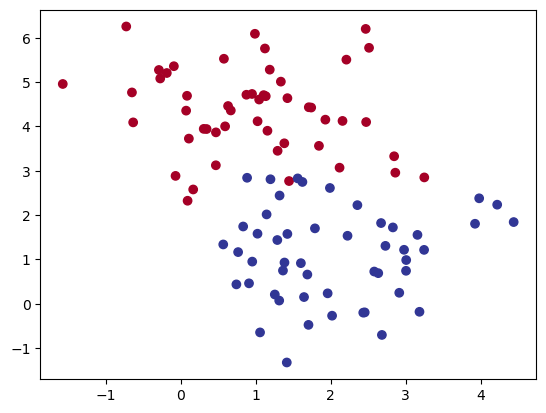

In [7]:
plt.scatter(x=X[:, 0], y=X[:,1], c=blobs['label'], cmap=plt.cm.RdYlBu);

## Neural Network Functions

This section details the various components of the perceptron model, including the sigmoid activation function, the output formula, the error calculation, and the gradient descent step for updating weights.

### Sigmoid Activation Function

The sigmoid activation function maps input values into a continuous output between 0 and 1. This function is essential for introducing non-linearity into the perceptron model, allowing it to learn complex decision boundaries. The sigmoid function is defined as:

$$
\text{sigmoid}(x) = \frac{1}{1 + e^{-x}}
$$

Here, \(x\) is the input, and the output represents the activation level after the input \(x\) has been processed by the function.

### Output (Prediction) Formula

The output formula computes the predicted output of the perceptron model for a given set of input features. It combines the input features, weights, and bias using a linear transformation, followed by applying the sigmoid activation function. The output formula can be represented as:

$$
\text{prediction} = \text{sigmoid}(\text{np.dot(features, weights) + bias})
$$

Here, \(np.dot(features, weights)\) computes the dot product between the input features and the weights, and then the bias is added before applying the sigmoid activation.

### Error (Log-Loss) Formula

The error formula calculates the log-loss, a common loss function for binary classification tasks, which measures the performance of the model in terms of accuracy. It computes the error by comparing the predicted output with the true labels using the log loss formula:

$$
\text{error} = - y \cdot \log(\text{output}) - (1 - y) \cdot \log(1 - \text{output})
$$

Where \(y\) is the true label, and \(output\) is the predicted output from the model.

### Gradient Descent Step (Update Weights)

The gradient descent step updates the weights and bias of the perceptron model to minimize the error. It computes the gradient of the error function with respect to the weights and bias and then adjusts them accordingly using the learning rate. The update formula can be represented as:

$$
\text{weights} += \text{learnrate} \cdot d_{\text{error}} \cdot \text{x}
$$

Where \(error\) is the derivative of the error, \(x\) is the input feature vector, and \(learnrate\) is the learning rate. The bias is also updated using the derivative:

$$
\text{bias} += \text{learnrate} \cdot d_{\text{error}}
$$

### Calculate Error Function

The calculate_error function computes the mean error (log-loss) across all instances. It uses the output formula to get predictions and then calls the error formula to compute the log-loss for each instance. The mean of these error values gives the overall error of the model.


In [4]:
# Sigmoid (activation) function
def sigmoid(x):
  """
  Sigmoid Activation Function

  Parameters:
    x (ndarray or scalar): Input value or array of values to be transformed by the sigmoid function.

  Returns:
    activation (ndarray or scalar): Value or array of values after x is passed through sigmoid activation.
  """
  activation = 1 / (1 + np.exp(-x))
  return activation

# Output (prediction) formula
def output_formula(features, weights, bias):
  """
  Output (Prediction) Formula

  Parameters:
    features (ndarray): Input features for the prediction.
    weights (ndarray): Weights for the features.
    bias (scalar): Bias term.

  Returns:
    prediction (ndarray or scalar): The predicted output after applying the sigmoid function.
  """
  prediction = sigmoid(np.dot(features, weights) + bias)
  return prediction

# Error (log-loss) formula
def error_formula(y, output):
  """
  Error (Log-Loss) Formula

  Parameters:
    y (ndarray or scalar): True labels.
    output (ndarray or scalar): Predicted outputs from the model.

  Returns:
    error (ndarray or scalar): Log-loss error between the true labels and predicted outputs.
  """
  error = - y * np.log(output) - (1 - y) * np.log(1 - output)
  return error

# Gradient descent step (update weights)
def update_weights(x, y, weights, bias, learnrate):
  """
  Gradient Descent Step (Update Weights)

  Parameters:
    x (ndarray): Input features for the training instance.
    y (scalar): True label for the training instance.
    weights (ndarray): Current weights of the model.
    bias (scalar): Current bias of the model.
    learnrate (scalar): Learning rate for weight updates.

  Returns:
    weights (ndarray): Updated weights after the gradient descent step.
    bias (scalar): Updated bias after the gradient descent step.
  """
  output = output_formula(x, weights, bias)
  d_error = y - output
  weights += learnrate * d_error * x
  bias += learnrate * d_error
  return weights, bias

# Calculate error function (calls previous functions)
def calculate_error(features, targets, weights, bias):
  """
  Calculate the Error

  Parameters:
    features (ndarray): Input features for all instances.
    targets (ndarray): True labels for all instances.
    weights (ndarray): Weights for the features.
    bias (scalar): Bias term.

  Returns:
    mean_error (scalar): The mean log-loss error between the true labels and predicted outputs.
  """
  predictions = output_formula(features, weights, bias)
  error = error_formula(targets, predictions)
  mean_error = np.mean(error)
  return mean_error


## Training a Perceptron Model

The training process aims to minimize the error between the predicted output and the true labels using the gradient descent method. Here's a detailed breakdown:

### Training Procedure

1. **Initialization**: Initialize the weights and bias of the perceptron model with random values.

2. **Epochs**: The model iterates through the dataset for each epoch where an epoch represents the training data making a complete pass through the model.

3. **Forward Pass and Prediction**: For each epoch, calculate the predicted output using the linear function combined with the sigmoid activation function.

4. **Error Calculation**: Calculate the error (log-loss) for the prediction using the true label and the predicted output.

5. **Gradient Computation and Update**: Compute the gradients of the error function with respect to the weights and bias and then update the weights and biases.

6. **Tracking Progress**: Print the error after every 10 epochs to monitor the convergence of the model.

7. **Final Weights and Bias**: Print the final weights and bias after completing the training process.

This iterative training procedure ensures that the perceptron model learns effectively and minimizes the overall error, allowing it to make accurate predictions based on the input features and true labels.


In [5]:
epochs = 1000
learn_rate = 0.01

def train(features, targets, epochs, learnrate):
    """
    Train a Model Using Gradient Descent Defined Above

    Parameters:
        features (ndarray): Input features for all instances.
        targets (ndarray): True labels for all instances.
        epochs (int): Number of epochs to run the training process.
        learnrate (scalar): Learning rate for weight updates.

    Returns:
        weights (ndarray): Final weights after the training process.
        bias (scalar): Final bias after the training process.
    """
    # Initialize weights and bias
    weights = np.random.rand(2)  # initializing 2 weights since we have 2 features
    bias = np.random.rand(1)

    for epoch in range(epochs):
        # Iterate through each data point
        for x_i, y_i in zip(features, targets):
            # Calculate the predicted output
            output = output_formula(x_i, weights, bias)

            # Calculate the error and gradients
            error = error_formula(y_i, output)
            d_error = y_i - output

            # Update the weights and bias using gradient descent
            weights, bias = update_weights(x_i, y_i, weights, bias, learnrate)

        # Print the error at every 10 epochs for tracking progress
        if epoch % 10 == 0:
            print("Epoch:", epoch, "Error:", np.mean(error))
            print("Weights:", weights)
            print("Bias:", bias)
            print("="*50)

    # Print final weights and bias
    print("\nFinal weights:", weights)
    print("Final bias:", bias)
    return weights, bias

# Call the train function with the provided parameters
weights, bias = train(X, y, epochs, learn_rate)

Epoch: 0 Error: 0.7164176624792601
Weights: [ 0.25768848 -0.33480009]
Bias: [0.34754039]
Epoch: 10 Error: 0.7685116537391108
Weights: [ 1.07695299 -1.08929093]
Bias: [0.88376953]
Epoch: 20 Error: 0.7059038253649972
Weights: [ 1.23850397 -1.31140833]
Bias: [1.25532114]
Epoch: 30 Error: 0.6478468843996701
Weights: [ 1.27839893 -1.44414647]
Bias: [1.57015772]
Epoch: 40 Error: 0.5957589099602394
Weights: [ 1.27213643 -1.53847999]
Bias: [1.85090887]
Epoch: 50 Error: 0.5494489367859428
Weights: [ 1.24563201 -1.61245923]
Bias: [2.10681598]
Epoch: 60 Error: 0.5084045327939597
Weights: [ 1.21051076 -1.67452381]
Bias: [2.34289779]
Epoch: 70 Error: 0.4720445348906817
Weights: [ 1.17259588 -1.72916521]
Bias: [2.56235919]
Epoch: 80 Error: 0.4397983081603289
Weights: [ 1.13490237 -1.77893668]
Bias: [2.76747736]
Epoch: 90 Error: 0.4111372355075909
Weights: [ 1.09895241 -1.8253398 ]
Bias: [2.95999344]
Epoch: 100 Error: 0.38558730687309867
Weights: [ 1.06544017 -1.86927371]
Bias: [3.14130705]
Epoch: 11

## Visualize Results
Display what the model has learned.

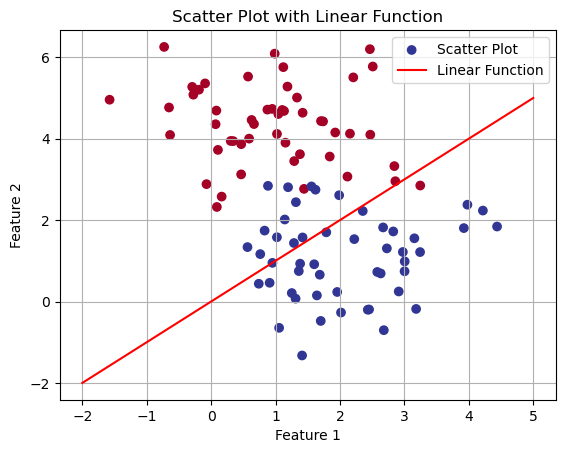

In [6]:
def linear_function(x, weights, bias):
  """
  Generate the predicted linear function

  Parameters:
    x (ndarray or scalar): Input value or array of values to be processed by the linear function.
    weights (ndarray): Coefficients (weights) for the linear function.
    bias (scalar): Bias term for the linear function.

  Returns:
    linear (ndarray or scalar): Computed linear combination of input values, weights, and bias.
  """
  linear = x * weights[0] + x * weights[1] + bias
  return linear


x_values = np.linspace(-2, 5, 100)
y_values = np.linspace(-2, 5, 100)
plt.scatter(x=X[:, 0], y=X[:, 1], c=y, cmap=plt.cm.RdYlBu, label='Scatter Plot')
plt.plot(x_values, y_values, label='Linear Function', color='red')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatter Plot with Linear Function')
plt.legend()
plt.grid(True)
plt.show()

## Conclusion

1. Neural networks learn by iteratively adjusitng their weights and biases with the goal of minimizing error.
2. Key components for this project included the sigmoid activation function, prediction formula, error calculation, and gradient descent.
3. The combination of defining our functions and training loop enables the model to accurately make predictions on clustered blobs of data. 